In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../dataset/AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')

df.set_index('Month', inplace=True)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [5]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [6]:
ts = df['#Passengers']
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [7]:
ts['1949-01-01']

np.int64(112)

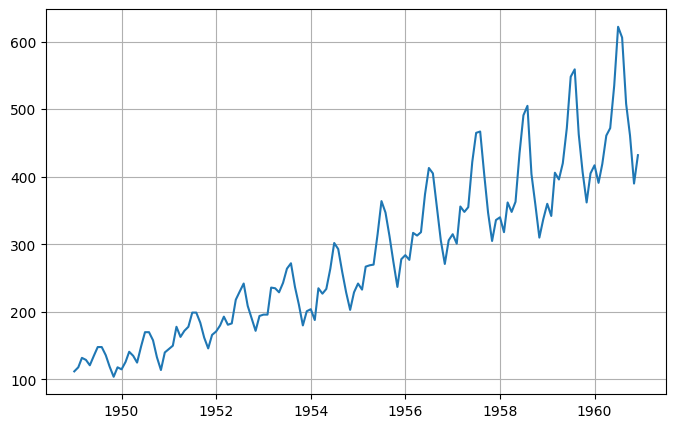

In [8]:
# Check Stationarity

plt.figure(figsize=(8,5))
plt.plot(ts)
plt.grid(True)
plt.show()

### Stationarity Test

In [9]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    roleman = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    
    plt.figure(figsize=(8,6))
    orginal = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(roleman, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perfrom Dickey-Fuller test
    print("Result Of Dickey-Fuller test")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number od Observations used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

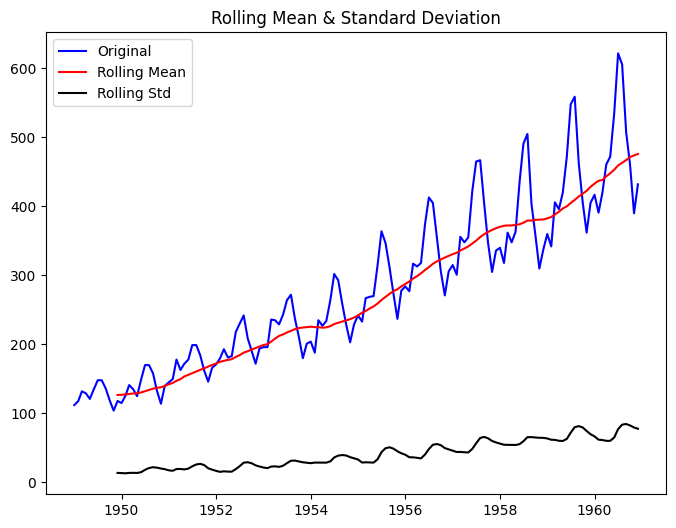

Result Of Dickey-Fuller test
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number od Observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [10]:
test_stationarity(ts)

### Make ts stationary

- Log Transformation
- Differencing
- Double Log
- Double Differencing
- Log + Differencing

In [11]:
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [12]:
ts_log = np.log(ts)

In [13]:
ts_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
Name: #Passengers, dtype: float64

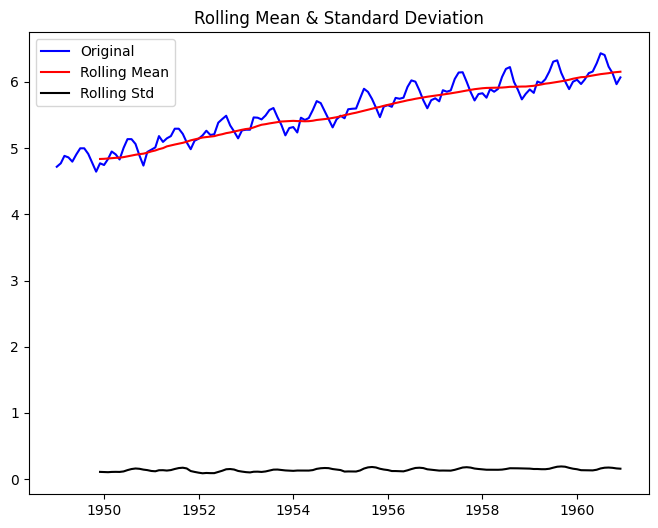

Result Of Dickey-Fuller test
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number od Observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [14]:
test_stationarity(ts_log)

In [15]:
ts_doublelog = np.log(ts_log)

In [16]:
ts_doublelog.head()

Month
1949-01-01    1.551491
1949-02-01    1.562490
1949-03-01    1.585719
1949-04-01    1.581000
1949-05-01    1.567739
Name: #Passengers, dtype: float64

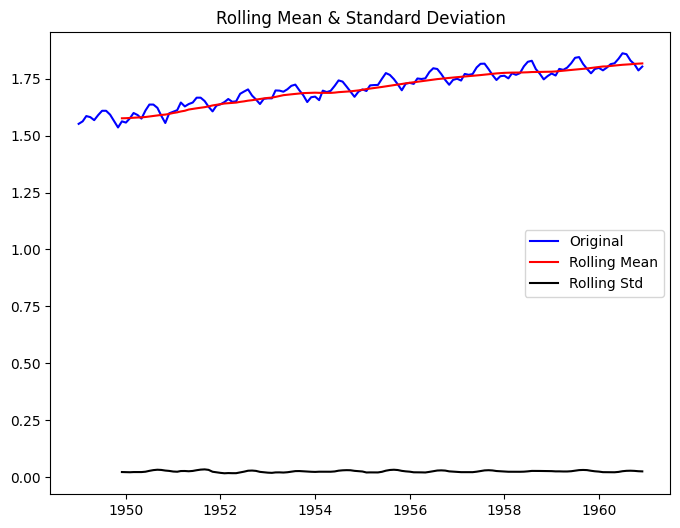

Result Of Dickey-Fuller test
Test Statistic                  -2.156028
p-value                          0.222590
#Lags Used                      13.000000
Number od Observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [17]:
test_stationarity(ts_doublelog)

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
Name: #Passengers, dtype: float64

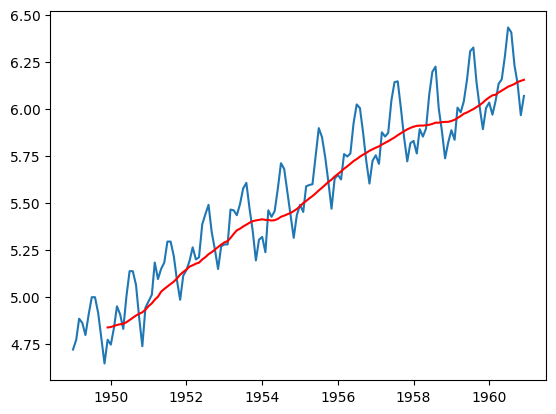

In [18]:
#Smoothing

moving_avg = pd.Series(ts_log).rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head()

ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head(5)


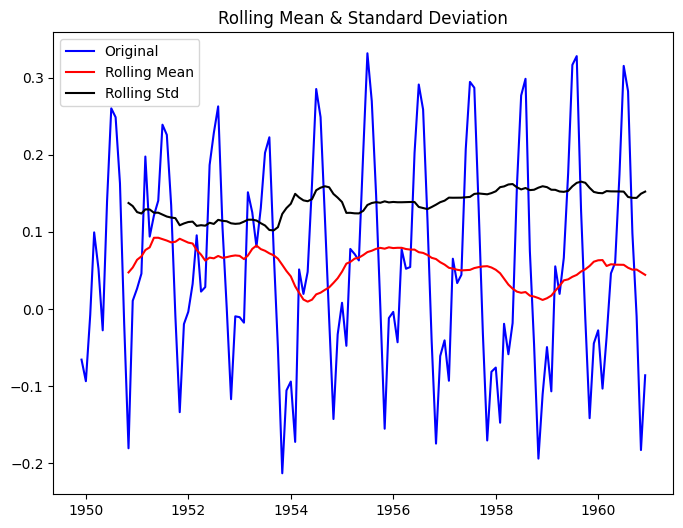

Result Of Dickey-Fuller test
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number od Observations used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [19]:
test_stationarity(ts_log_moving_avg_diff)

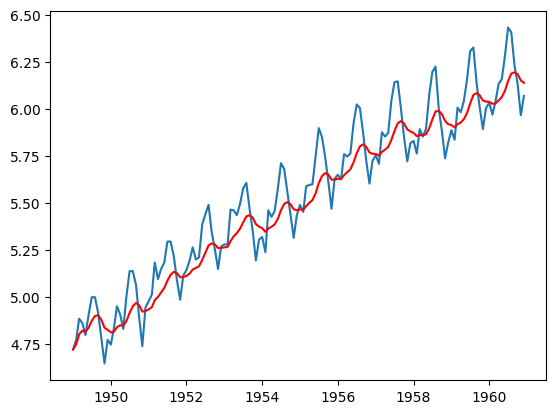

In [20]:
expwighted_avg = ts_log.ewm(span=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

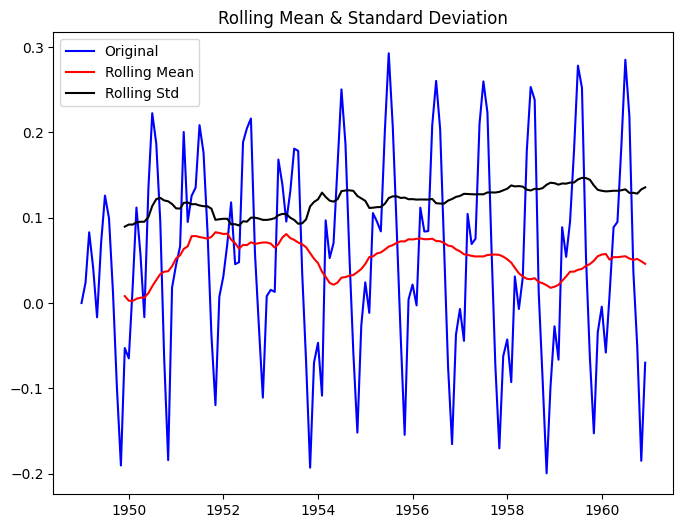

Result Of Dickey-Fuller test
Test Statistic                  -3.310542
p-value                          0.014414
#Lags Used                      13.000000
Number od Observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [21]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

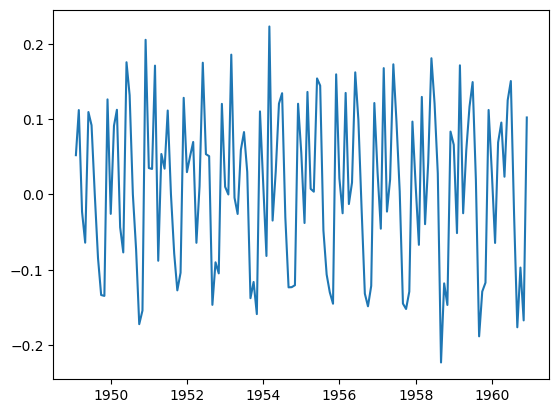

In [22]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

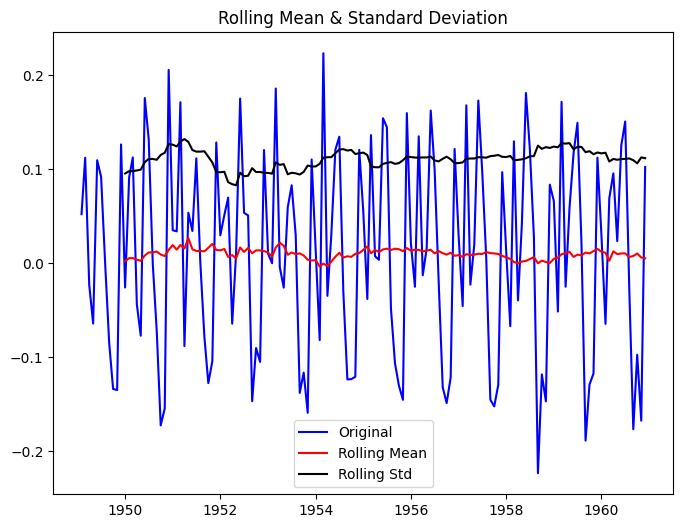

Result Of Dickey-Fuller test
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number od Observations used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [23]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

#### Decomposition

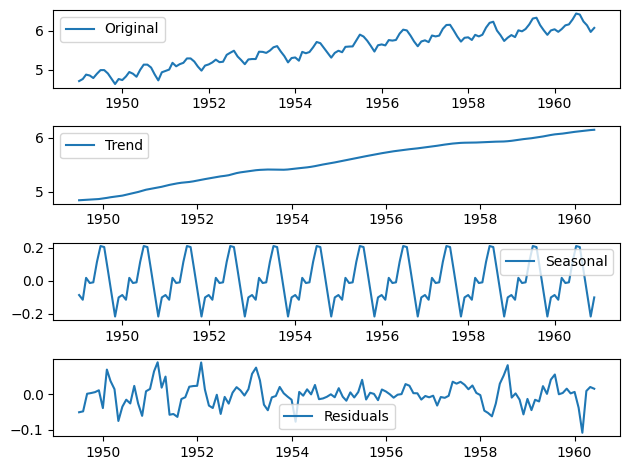

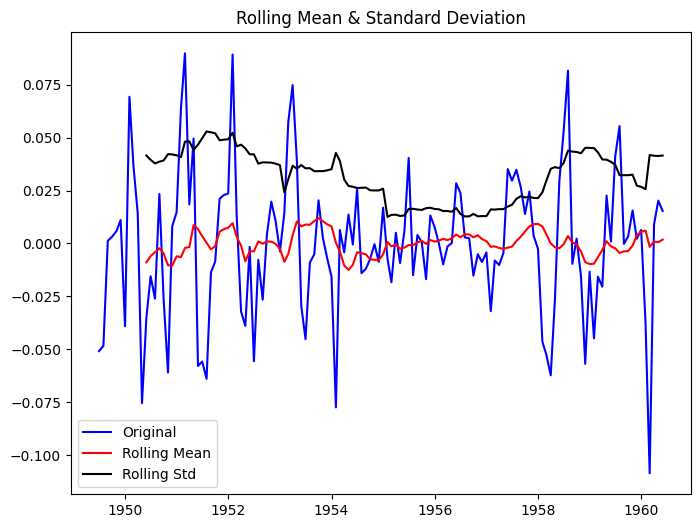

Result Of Dickey-Fuller test
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number od Observations used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [25]:
#ACF and PACF plots:

from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

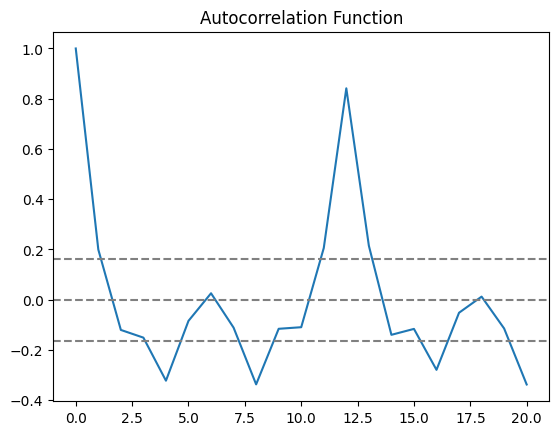

In [26]:
#Plot ACF:      
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

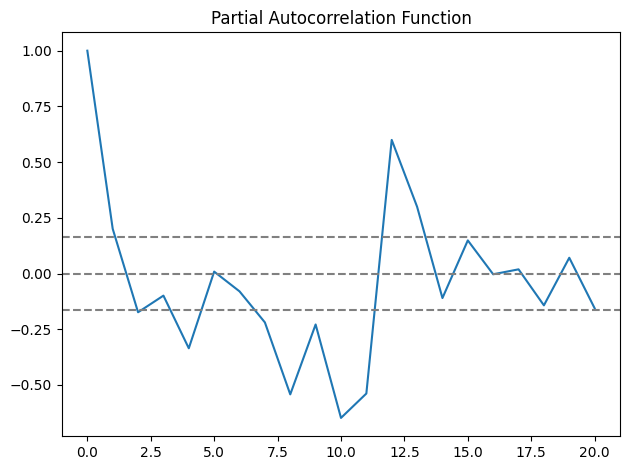

In [27]:
#Plot PACF:
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

## Model Building

In [28]:
ts_value = ts_log.values

x = ts_value
split = int(len(x) * 0.67)
train, test = x[:split], x[split:]

In [29]:
len(train)

96

In [30]:
len(test)

48

In [31]:
# AR Model

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from numpy.linalg import LinAlgError
import warnings
warnings.filterwarnings('ignore')

In [32]:
# p -> 4
# d -> 1
# q -> 2

In [33]:
history = [x for x in train]
prediction = list()

for t in range(len(test)):
    try:
        model = ARIMA(history, order=(4, 1, 2))
        model_fit = model.fit()
        output = model_fit.forecast()
        prediction.append(output)
        
        obs = test[t]
        history.append(obs)
        
    except(ValueError, LinAlgError):
        pass
    
    print('Predicted = %f, expected = %f' % (output, obs))

error = mean_squared_error(test, prediction)
rmse = np.sqrt(error)

print("Test RMSE : %.3f" % rmse)

Predicted = 5.773418, expected = 5.752573
Predicted = 5.722715, expected = 5.707110
Predicted = 5.731420, expected = 5.874931
Predicted = 5.884513, expected = 5.852202
Predicted = 5.771684, expected = 5.872118
Predicted = 5.924874, expected = 6.045005
Predicted = 6.023705, expected = 6.142037
Predicted = 6.163743, expected = 6.146329
Predicted = 6.173356, expected = 6.001415
Predicted = 5.897037, expected = 5.849325
Predicted = 5.802941, expected = 5.720312
Predicted = 5.774895, expected = 5.817111
Predicted = 5.858829, expected = 5.828946
Predicted = 5.792582, expected = 5.762051
Predicted = 5.785876, expected = 5.891644
Predicted = 5.919775, expected = 5.852202
Predicted = 5.807306, expected = 5.894403
Predicted = 5.932264, expected = 6.075346
Predicted = 6.064178, expected = 6.196444
Predicted = 6.213094, expected = 6.224558
Predicted = 6.257102, expected = 6.001415
Predicted = 5.890140, expected = 5.883322
Predicted = 5.858096, expected = 5.736572
Predicted = 5.699472, expected = 5

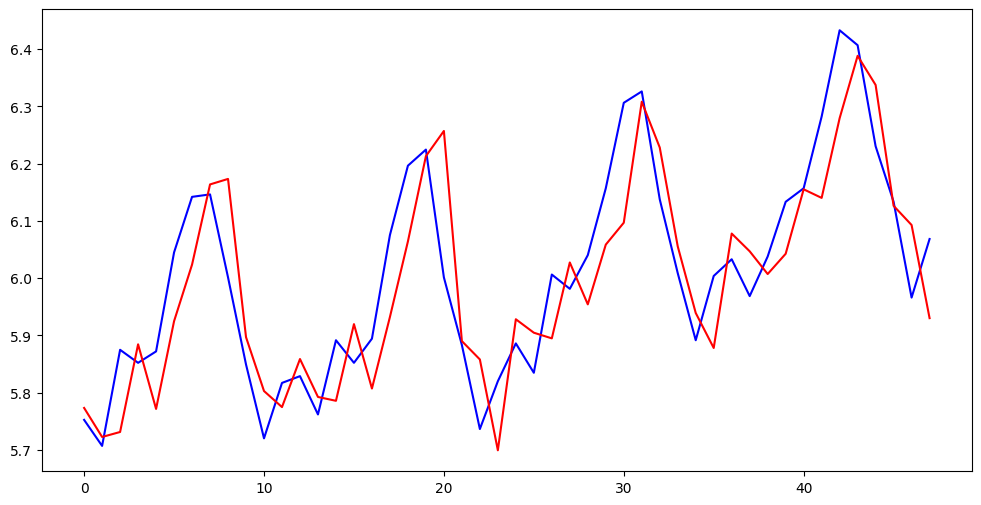

In [34]:
# plot
plt.figure(figsize=(12,6))
plt.plot(test, color = 'blue', label='test')   
plt.plot(prediction, color='red', label='pred')
plt.show()

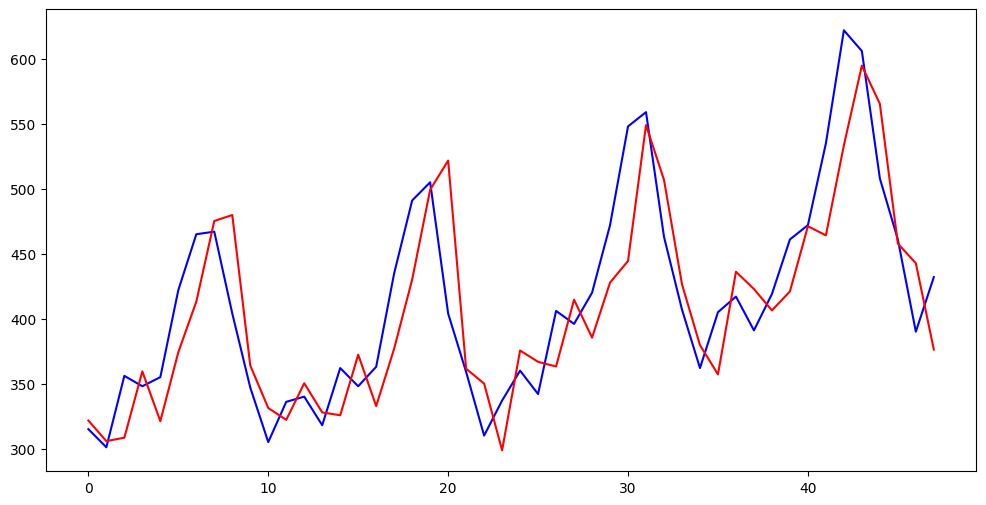

In [35]:
plt.figure(figsize=(12,6))
plt.plot(np.exp(test), color = 'blue', label='test')   
plt.plot(np.exp(prediction), color='red', label='pred')
plt.show()

In [36]:
from math import sqrt
rms = sqrt(mean_squared_error(np.exp(test), np.exp(prediction)))
print('Mean Squarred Error: %.2f'% rms)

Mean Squarred Error: 43.26


In [38]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

p_value = [1,2,3,4,5,6]
d_value = [0,1,2]
q_value = [1,2,3,4,5,6]

best_rmse, best_p, best_d, best_q = np.inf, None, None, None
history = [x for x in train]

prediction = list()

for p in p_value:
    for d in d_value:
        for q in q_value:
            order = (p, d, q)
            try:
                for t in range(len(test)):
                    model = ARIMA(history, order=order)
                    model_fit = model.fit()
                    yhat = model_fit.forcast()[0]
                    prediction.append(yhat)
                    history.append(test[t])
                    
                    rmse = np.sqrt(mean_squared_error(test, prediction))
                    
                    if rmse < best_rmse:
                        best_rmse, best_p, best_d, best_q = rmse, p, d, q
            except:
                continue

print(f"Best RMSE : {best_rmse}")             
print(f"Best P : {best_p}")             
print(f"Best d : {best_d}")             
print(f"Best q : {best_p}")

Best RMSE : inf
Best P : None
Best d : None
Best q : None
